# INF552 Homework 2

## Name: Mahima Bhargava
## USC ID: 3936853735

### Reading the data

In [2]:
import pandas as pd
data=pd.read_excel('../data/Folds5x2_pp.xlsx')
data

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90
...,...,...,...,...,...
9563,16.65,49.69,1014.01,91.00,460.03
9564,13.19,39.18,1023.67,66.78,469.62
9565,31.32,74.33,1012.92,36.48,429.57
9566,24.48,69.45,1013.86,62.39,435.74


### 1(b) Exploring the data
#### i. How many rows are in this data set? How many columns? What do the rows and columns represent?


There are 9568 rows and 5 columns in this dataset. 
The rows are the observations/record of operating logs which were recorded from a full load Combined Cycle Power Plant over 6 years.
4 of the 5 columns represent different features value- 'AT','V','AP'and'RH'  which refer to 'Temperature', 'Exhaust Vacuum', 'Ambient Pressure', 'Relative Humidity' respectively. These are used to predict the target variable, the last column- 'PE' column,which represents the net hourly electrical energy output. 

#### 1(b) ii. Make pairwise scatterplots of all the varianbles in the data set including the predictors (independent variables) with the dependent variable. Describe your findings.


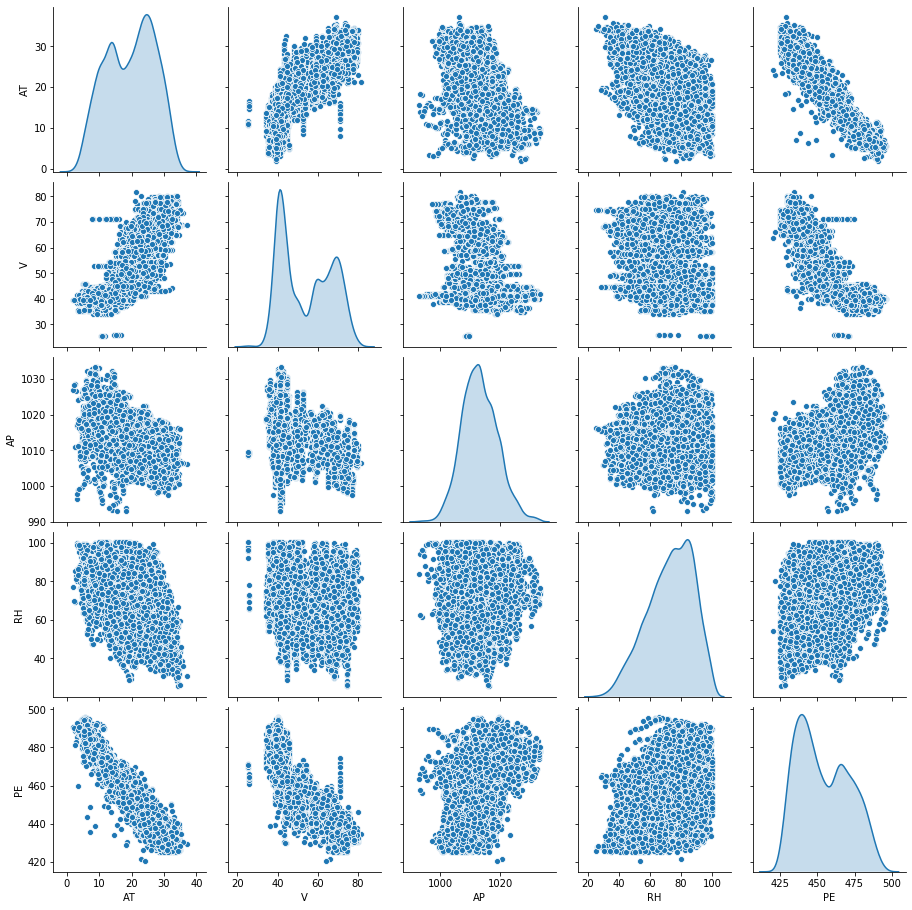

In [3]:
import seaborn as sns
sns.pairplot(data,diag_kind="kde",kind="scatter")

##### Findings
From the pairwise scatterplots, it appears that there exists some correlation between some variables-:

-when temperature(AT) rises, the energy output(PE) drop sharply (negative correlation)

-when temperature(AT) rises, exhaust vaccum(V) goes up (positive correlation)

-when exhaust vaccum(V) rises, the energy output(PE) drop sharply (negative correlation)


Ambient pressure(AP) and relative humidity(RH) are poorly correlated with PE



#### 1(b) iii. What are the mean, the median, range, first and third quartiles, and interquartile ranges of each of the variables in the dataset? Summarize them in a table.

In [4]:
import numpy as np
#converting the columns into numpy arrays and using numpy to calculate mean,median,quartiles
column_list=data.columns.values.tolist()
summary=[]
for column in column_list:
    column_data=np.array(data[column].tolist())
    mean=np.mean(column_data)
    crange=np.max(column_data)-np.min(column_data)
    quartiles=np.percentile(column_data, [25, 50, 75])
    interquartile=quartiles[2]-quartiles[0]
    col_summary=[mean,quartiles[1],crange,quartiles[0],quartiles[2],interquartile]
    #print(col_summary)
    summary.append(col_summary)

result_summary=pd.DataFrame(summary,index=column_list,columns=['mean','median','range','first quartile','third quartile','interquartile-range'])
print('Summary table')
result_summary

Summary table


,mean,median,range,first quartile,third quartile,interquartile-range
AT,19.651231,20.345,35.30,13.5100,25.72,12.2100
V,54.305804,52.080,56.20,41.7400,66.54,24.8000
AP,1013.259078,1012.940,40.41,1009.1000,1017.26,8.1600
RH,73.308978,74.975,74.60,63.3275,84.83,21.5025
PE,454.365009,451.550,75.50,439.7500,468.43,28.6800


#### 1(c) For each predictor, fit a simple linear regression model to predict the response. Describe your results. In which of the models is there a statistically significant association between the predictor and the response? Create some plots to back up your assertions. Are there any outliers that you would like to remove from your data for each of these regression tasks?

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                 8.510e+04
Date:                Fri, 12 Jun 2020   Prob (F-statistic):               0.00
Time:                        15:25:31   Log-Likelihood:                -29756.
No. Observations:                9568   AIC:                         5.952e+04
Df Residuals:                    9566   BIC:                         5.953e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    497.0341      0.156   3177.280      0.0

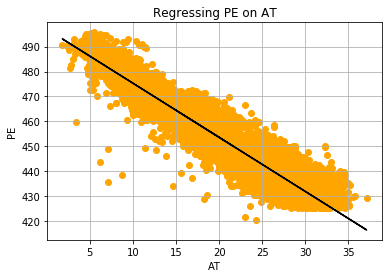

Mean Squared Error 29.431702011093517


<Figure size 432x288 with 0 Axes>

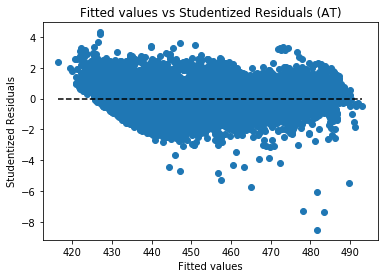

In [5]:
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

SLR_coef=[] #for later use in e

mydata = data[['AT', 'PE']]
reg = smf.ols(formula = 'PE ~ AT', data = mydata).fit()
print(reg.summary())
predictions = reg.predict(data['AT'])
# adding the parameter for AT for later use in 1e
SLR_coef.append(reg.params[1]) 
#print(SLR_coef)

plt.scatter(x=mydata['AT'],y=mydata['PE'],color='orange')
plt.plot(mydata['AT'], predictions, color='black')
plt.title("Regressing PE on AT")
plt.xlabel("AT")
plt.ylabel("PE")
plt.grid()
plt.show()

residual_values= mydata['PE'] - predictions
plt.figure()
#plt.scatter(predictions,residual_values)
print("Mean Squared Error",mean_squared_error(y_true=mydata['PE'],y_pred= predictions))



# Reference : https://towardsdatascience.com/going-from-r-to-python-linear-regression-diagnostic-plots-144d1c4aa5a
plt.figure()
residuals = reg.resid
fitted = reg.fittedvalues
stud_residuals = reg.get_influence().resid_studentized_external
plt.scatter(fitted,stud_residuals )
plt.plot([min(fitted),max(fitted)],[0,0],color = 'k',linestyle = '--')
plt.title("Fitted values vs Studentized Residuals (AT)")
plt.xlabel("Fitted values")
plt.ylabel("Studentized Residuals")
plt.show()


                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.756
Method:                 Least Squares   F-statistic:                 2.972e+04
Date:                Fri, 12 Jun 2020   Prob (F-statistic):               0.00
Time:                        15:25:42   Log-Likelihood:                -33963.
No. Observations:                9568   AIC:                         6.793e+04
Df Residuals:                    9566   BIC:                         6.794e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    517.8015      0.378   1370.218      0.0

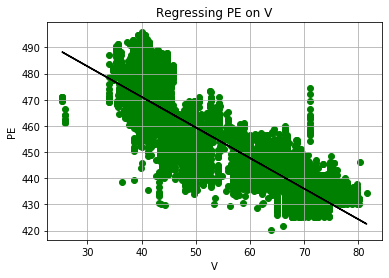

Mean Squared Error 70.91465103018828


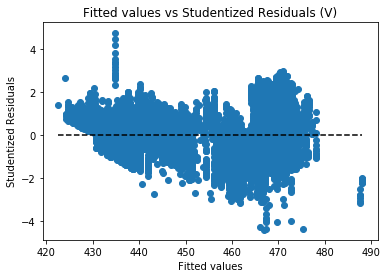

In [6]:
mydata = data[['V', 'PE']]
reg = smf.ols(formula = 'PE ~ V', data = mydata).fit()
print(reg.summary())
predictions = reg.predict(data['V'])

# adding the parameter for V for later use in 1e
SLR_coef.append(reg.params[1]) 
#print(SLR_coef)

plt.scatter(x=mydata['V'],y=mydata['PE'],color='green')
plt.plot(mydata['V'], predictions, color='black')
plt.title("Regressing PE on V")
plt.xlabel("V")
plt.ylabel("PE")
plt.grid()
plt.show()

print("Mean Squared Error",mean_squared_error(y_true=mydata['PE'],y_pred= predictions))


residuals = reg.resid
fitted = reg.fittedvalues
stud_residuals = reg.get_influence().resid_studentized_external
plt.scatter(fitted,stud_residuals )
plt.plot([min(fitted),max(fitted)],[0,0],color = 'k',linestyle = '--')
plt.title("Fitted values vs Studentized Residuals (V)")
plt.xlabel("Fitted values")
plt.ylabel("Studentized Residuals")
plt.show()

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.269
Model:                            OLS   Adj. R-squared:                  0.269
Method:                 Least Squares   F-statistic:                     3516.
Date:                Fri, 12 Jun 2020   Prob (F-statistic):               0.00
Time:                        15:25:54   Log-Likelihood:                -39224.
No. Observations:                9568   AIC:                         7.845e+04
Df Residuals:                    9566   BIC:                         7.847e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1055.2610     25.459    -41.449      0.0

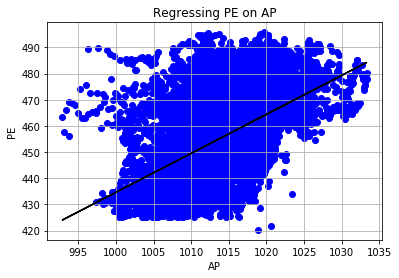

Mean Squared Error 212.9724998331263


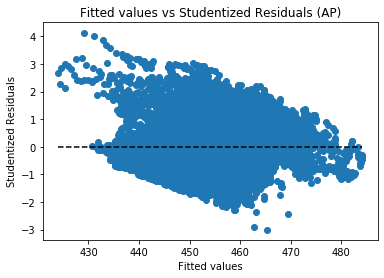

In [7]:
mydata = data[['AP', 'PE']]
reg = smf.ols(formula = 'PE ~ AP', data = mydata).fit()
print(reg.summary())
predictions = reg.predict(data['AP'])

# adding the parameter for AP for later use in 1e
SLR_coef.append(reg.params[1]) 
#print(SLR_coef)

plt.scatter(x=mydata['AP'],y=mydata['PE'],color='blue')
plt.plot(mydata['AP'], predictions, color='black')
plt.title("Regressing PE on AP")
plt.xlabel("AP")
plt.ylabel("PE")
plt.grid()
plt.show()

print("Mean Squared Error",mean_squared_error(y_true=mydata['PE'],y_pred= predictions))

residuals = reg.resid
fitted = reg.fittedvalues
stud_residuals = reg.get_influence().resid_studentized_external
plt.scatter(fitted,stud_residuals )
plt.plot([min(fitted),max(fitted)],[0,0],color = 'k',linestyle = '--')
plt.title("Fitted values vs Studentized Residuals (AP)")
plt.xlabel("Fitted values")
plt.ylabel("Studentized Residuals")
plt.show()

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.152
Model:                            OLS   Adj. R-squared:                  0.152
Method:                 Least Squares   F-statistic:                     1714.
Date:                Fri, 12 Jun 2020   Prob (F-statistic):               0.00
Time:                        15:26:06   Log-Likelihood:                -39933.
No. Observations:                9568   AIC:                         7.987e+04
Df Residuals:                    9566   BIC:                         7.988e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    420.9618      0.823    511.676      0.0

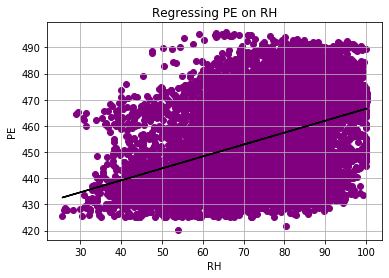

Mean Squared Error 246.99922809296348


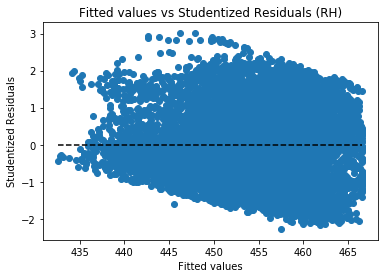

In [8]:
mydata = data[['RH', 'PE']]
reg = smf.ols(formula = 'PE ~ RH', data = mydata).fit()
print(reg.summary())
predictions = reg.predict(data['RH'])

# adding the parameter for RH for later use in 1e
SLR_coef.append(reg.params[1]) 
#print(SLR_coef)


plt.scatter(x=mydata['RH'],y=mydata['PE'],color="purple")
plt.plot(mydata['RH'], predictions, color='black')
plt.title("Regressing PE on RH")
plt.xlabel("RH")
plt.ylabel("PE")
plt.grid()
plt.show()

print("Mean Squared Error",mean_squared_error(y_true=mydata['PE'],y_pred= predictions))



residuals = reg.resid
fitted = reg.fittedvalues
stud_residuals = reg.get_influence().resid_studentized_external
plt.scatter(fitted,stud_residuals )
plt.plot([min(fitted),max(fitted)],[0,0],color = 'k',linestyle = '--')
plt.title("Fitted values vs Studentized Residuals (RH)")
plt.xlabel("Fitted values")
plt.ylabel("Studentized Residuals")
plt.show()

### Regarding statistical significant association
To answer this question statistically significant association between the predictor and the response, we perform four individual hypothesis testings for each of the 4 predictors- (1-> AT ,2->V ,3->AP, 4->RH), βj = 0 for j = 1,2,3,4 against Ha : βj not = 0. We can reject the null hypothesis for a given predictor, if the corresponding p-value is small enough. 
If we choose a p-value cutoff of 1%, then all predictors appear to have a statistically significant relationship to the response. 

For the models with AT and V respectively, the p-values are significant and MSE is quite low(AT-29.43 and V-70.91). The R-squared values for models with AT and V respectively are high,indicating that the models explain most of the variance in the response.

For the models with AP and RH respectively, the p-values are significant and MSE is relatively quite high(AP-212.97 and RH-246.99). The R-squared values for models these models are low,so these predictors only describe a small amount of the variation in the response (the models for these two predictors do not make good predictions of the response variable).

'AT' and 'V' have negative association with 'PE' while 'AP' and 'RH' have positive association with 'PE'.

### Regarding Outliers
Observations with studentized residual with an absolute value greater than 3 are possible outliers as per ISLR 3.3.3

a.) For AT: There are points beyond beyond the 3 and -3 range which are possible outliers. As we can see, these are few points and are away from the majority of the points, especially the points beyond -4 studentized residual values.

b.)For V: There are points beyond beyond the 3 and -3 range which are possible outliers. There are very few points at residual=4 and residual=-4 area which may be outliers.

c.)For AP: There are points beyond beyond the 3 and -3 range which are possible outliers.  There are very few points at residual=4 area which may be outliers.

d.)For RH: The points are within [-3,3] range and hence, there are no outliers. 

#### 1(d) Fit a multiple regression model to predict the response using all of the predictors. Describe your results. For which predictors can we reject the null hypothesis H0 : $β_{j}$ =0?

In [9]:
reg = smf.ols(formula = 'PE ~ AT + V + AP + RH', data = data).fit()
MLR_coef=reg.params[1:]
print(reg.summary())
predictions = reg.predict(data[['AT','V','AP','RH']])


print("Mean Squared Error",mean_squared_error(y_true=data['PE'],y_pred= predictions))

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                 3.114e+04
Date:                Fri, 12 Jun 2020   Prob (F-statistic):               0.00
Time:                        15:26:18   Log-Likelihood:                -28088.
No. Observations:                9568   AIC:                         5.619e+04
Df Residuals:                    9563   BIC:                         5.622e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    454.6093      9.749     46.634      0.0

From the result of multiple linear regression, we can see that the p-value of each predictor is less than 0.01(assuming a 1% cut-off). Therefore, we reject the null hypothesis for all independent variables and can state that all predictors have statistically significant relationships with our response variable.

The R-squared statistics for this model is 0.929, which is close to 1. This indicates that the model is quite accurate and explains most of the variability in the response variable PE. Also, the MSE is pretty low.


#### 1(e) How do your results from 1c compare to your results from 1d. Create a plot displaying the univariate regression coefficients from 1c on the x-axis, and the multiple regression coefficients from 1d on the y-axis. That is, each predictor is displayed as a single point in the plot. Its coefficient in a simple linear regression model is shown on the x-axis, and its coefficient estimate in the multiple linear regression model is shown on the y-axis.

AT SLR coef -2.1713199585178002 MLR_coef -1.9775131066353933
V SLR coef -1.1681351265557094 MLR_coef -0.23391642258249778
AP SLR coef 1.4898716733991142 MLR_coef 0.06208294378085516
RH SLR coef 0.455650102262979 MLR_coef -0.15805410291641486


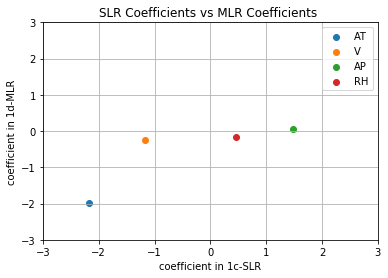

In [10]:
predictors=["AT","V","AP","RH"]
plt.title("SLR Coefficients vs MLR Coefficients ")
plt.xlabel('coefficient in 1c-SLR')
plt.ylabel('coefficient in 1d-MLR')
plt.grid()
plt.xlim(-3,3)
plt.ylim(-3,3)
for i in range(len(predictors)):
    plt.scatter(SLR_coef[i], MLR_coef[i], label=predictors[i])
    print(predictors[i],'SLR coef',SLR_coef[i],'MLR_coef',MLR_coef[i])
    
#plt.scatter(SLR_coef,MLR_coef)
plt.legend()
plt.show()

#### Conclusion
The simple and multiple regression coefficients and different. The difference in coefficients is due to the fact that in the case of univariate regression, the slope for each predictor represents the average effect of a unit increase in that predictor on response, ignoring other predictors. On the other hand, in the case of multivariate regression, the slope for each predictor represents the average effect of a unit increase in the predictor on response, keeping other predictors fixed.  

The weight (absolute coefficient value) of every predictor decreases on fitting multiple linear regression. The coefficients for AT and V increase while those for AP and RH decrease. 
Note: the relationship between RH and PE changes from positive to negative.


#### 1(f) Is there evidence of nonlinear association between any of the predictors and the response? To answer this question, for each predictor X, fit a model of the form
Y =$β_{0}$ + $β_{1}$X + $β_{2}$ $X^{2}$ + $β_{3}$ $X^{3}$ + ε

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                 3.299e+04
Date:                Fri, 12 Jun 2020   Prob (F-statistic):               0.00
Time:                        15:26:18   Log-Likelihood:                -29101.
No. Observations:                9568   AIC:                         5.821e+04
Df Residuals:                    9564   BIC:                         5.824e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    492.7281      0.673    732.248      0.0

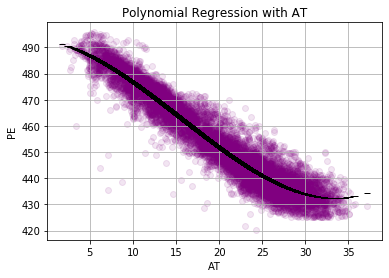

Mean Squared Error 25.664339681466892


In [11]:
#AT and PE
mydata = data[['AT', 'PE']]
mydata=mydata.assign(AT2 = mydata.AT ** 2)
mydata=mydata.assign(AT3 = mydata.AT ** 3)
#print(mydata)

reg = smf.ols(formula = 'PE ~ AT + AT2 + AT3', data = mydata).fit()
print(reg.summary())
predictions = reg.predict(mydata[['AT','AT2','AT3']])

plt.scatter(mydata['AT'],data['PE'],color="purple",alpha=0.1)
plt.plot(mydata['AT'], predictions,'k_',linewidth=5)
plt.title("Polynomial Regression with AT")
plt.xlabel("AT")
plt.ylabel("PE")
plt.grid()
plt.show()

print("Mean Squared Error",mean_squared_error(y_true=mydata['PE'],y_pred= predictions))

#residuals = mydata['PE'] - predictions
#plt.figure()
#plt.plot(predictions,residuals,'b.')
#plt.show()


#### Conclusion for AT
We can see that the p-values for AT2(AT^2) and AT3(AT^3) predictors are both equal to 0 and we can reject the null hypothesis for these coefficients . That is, these coefficients are non-zero and are significant considering the significance level to be 1%. This acts as evidence that nonlinear association exists between the predictor AT and response PE. 


                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                 1.098e+04
Date:                Fri, 12 Jun 2020   Prob (F-statistic):               0.00
Time:                        15:26:18   Log-Likelihood:                -33585.
No. Observations:                9568   AIC:                         6.718e+04
Df Residuals:                    9564   BIC:                         6.721e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    554.1468      9.151     60.557      0.0

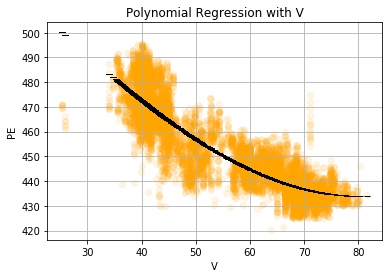

Mean Squared Error 65.52527085562211


In [12]:
#V and PE
mydata = data[['V', 'PE']]
mydata=mydata.assign(V2 = mydata.V ** 2)
mydata=mydata.assign(V3 = mydata.V ** 3)
#print(mydata)

reg = smf.ols(formula = 'PE ~ V + V2 + V3', data = mydata).fit()
print(reg.summary())
predictions = reg.predict(mydata[['V','V2','V3']])

plt.scatter(mydata['V'],data['PE'],color="orange",alpha=0.1)
plt.plot(mydata['V'], predictions,'k_',linewidth=5)
plt.title("Polynomial Regression with V")
plt.xlabel("V")
plt.ylabel("PE")
plt.grid()
plt.show()

print("Mean Squared Error",mean_squared_error(y_true=mydata['PE'],y_pred= predictions))





#### Conclusion for V
We can see that the p-values for V2(V^2) and V3(V^3) predictors are greater than 0.01, considering the significance level to be 1%.This means that we fail to reject null hypothesis. This acts as evidence that nonlinear association does exist between the predictor V and response PE. 


On the other hand, if we consider the significance level to be 5%, the p-value for V2(V^2) is greater than 0.05(fail to reject null hypothesis) and the p-value for V3(V^3) is less than 0.05(we can reject the null hypothesis). Under this condition, the slope for the cubic V term is significant and provides evidence for non-linear association between V and PE.




                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.275
Model:                            OLS   Adj. R-squared:                  0.275
Method:                 Least Squares   F-statistic:                     1813.
Date:                Fri, 12 Jun 2020   Prob (F-statistic):               0.00
Time:                        15:26:18   Log-Likelihood:                -39184.
No. Observations:                9568   AIC:                         7.837e+04
Df Residuals:                    9565   BIC:                         7.840e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0747      0.009      8.415      0.0

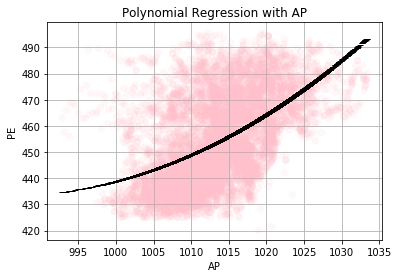

Mean Squared Error 211.19742224765565


In [13]:
# AP and PE
mydata = data[['AP', 'PE']]
mydata=mydata.assign(AP2 = mydata.AP ** 2)
mydata=mydata.assign(AP3 = mydata.AP ** 3)


reg = smf.ols(formula = 'PE ~ AP + AP2 + AP3', data = mydata).fit()
print(reg.summary())
predictions = reg.predict(mydata[['AP','AP2','AP3']])

plt.scatter(mydata['AP'],data['PE'],color="pink",alpha=0.1)
plt.plot(mydata['AP'], predictions,'k_',linewidth=5)
plt.title("Polynomial Regression with AP")
plt.xlabel("AP")
plt.ylabel("PE")
plt.grid()
plt.show()

print("Mean Squared Error",mean_squared_error(y_true=mydata['PE'],y_pred= predictions))





#### Conclusion for AP
We can see that the p-values for AP2(AP^2) and AP3(AP^3) predictors are both equal to 0 and we can reject the null hypothesis for these coefficients. That is, these coefficients are non-zero and are significant considering the significance level to be 1%. This acts as evidence that nonlinear association exists between the predictor AP and response PE.

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.154
Model:                            OLS   Adj. R-squared:                  0.153
Method:                 Least Squares   F-statistic:                     579.2
Date:                Fri, 12 Jun 2020   Prob (F-statistic):               0.00
Time:                        15:26:19   Log-Likelihood:                -39923.
No. Observations:                9568   AIC:                         7.985e+04
Df Residuals:                    9564   BIC:                         7.988e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    468.4135     10.545     44.422      0.0

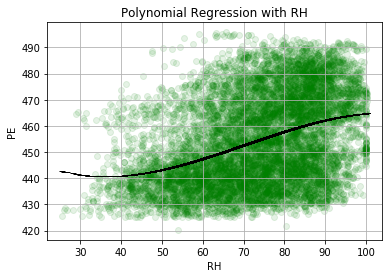

Mean Squared Error 246.47407323169548


In [14]:
#RH and PE
mydata = data[['RH', 'PE']]
mydata=mydata.assign(RH2 = mydata.RH ** 2)
mydata=mydata.assign(RH3 = mydata.RH ** 3)

reg = smf.ols(formula = 'PE ~ RH + RH2 + RH3', data = mydata).fit()
print(reg.summary())
predictions = reg.predict(mydata[['RH','RH2','RH3']])

plt.scatter(mydata['RH'],data['PE'],color="green",alpha=0.1)
plt.plot(mydata['RH'], predictions,'k_',linewidth=5)
plt.title("Polynomial Regression with RH")
plt.xlabel("RH")
plt.ylabel("PE")
plt.grid()
plt.show()

print("Mean Squared Error",mean_squared_error(y_true=mydata['PE'],y_pred= predictions))



#### Conclusion for RH
We can see that the p-values for RH2(RH^2) and RH3(RH^3) predictors are both equal to 0 and we can reject the null hypothesis for these coefficients. That is, these coefficients are non-zero and are significant considering the significance level to be 1%. This acts as evidence that nonlinear association exists between the predictor RH and response PE.


#### 1(g) Is there evidence of association of interactions of predictors with the response? To answer this question, run a full linear regression model with all pairwise interaction terms and state whether any interaction terms are statistically significant.


In [15]:
reg = smf.ols(formula='PE ~ AT + V + AP + RH + AT * V + AT * AP + AT * RH + V * AP + V * RH + AP * RH', data=data).fit()
print(reg.summary())


                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                 1.405e+04
Date:                Fri, 12 Jun 2020   Prob (F-statistic):               0.00
Time:                        15:26:19   Log-Likelihood:                -27548.
No. Observations:                9568   AIC:                         5.512e+04
Df Residuals:                    9557   BIC:                         5.520e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    685.7825     78.640      8.721      0.0

On fiitting a model with pairwise interactions terms, we can see that the p-values of 'AT', 'AP' and 'RH' are close to the 0.05 significance level bound. 
However, there are interaction terms which are statistically significant:-

a.)at any significance level, interaction terms for AT & V,    AT & RH,     V & AP  are statistically significant as p-value=0 for all of these terms

b.)at 0.05 significance level,interaction term for AP & RH is statistically significant.

c.)at 0.10 significance level, interaction term for V & RH is statistically significant.

AT & AP interaction term is not statistically significant.
Based on the hierarchical principle, we keep the main effects involved in these interactions in the model, regardless of the main-effects' p-values.

As R-squared statistic of this model is 0.936, this model explains most of the variance in the response variable and gives accurate estimates of response variable.



#### 1(h) Can you improve your model using possible interaction terms or nonlinear associations between the predictors and response? Train the regression model on a randomly selected 70% subset of the data with all predictors. Also, run a regression model involving all possible interaction terms and quadratic nonlinearities, and remove insignificant variables using p-values (be careful about interaction terms). Test both models on the remaining points and report your train and test MSEs.

In [34]:
from sklearn.model_selection import train_test_split

train_set,test_set=train_test_split(data,train_size=0.7,test_size=0.3,random_state=11)

In [35]:
MSE_list=[]
#Model with all predictors
reg = smf.ols(formula = 'PE ~ AT + V + AP + RH', data = train_set).fit()
print(reg.summary())

train_predictions = reg.predict(train_set[['AT','V','AP','RH']])
print("Mean Squared Error for training",mean_squared_error(y_true=train_set['PE'],y_pred= train_predictions))
MSE_list.append(mean_squared_error(y_true=train_set['PE'],y_pred= train_predictions))

test_predictions = reg.predict(test_set[['AT','V','AP','RH']])
print("Mean Squared Error for testing",mean_squared_error(y_true=test_set['PE'],y_pred= test_predictions))
MSE_list.append(mean_squared_error(y_true=test_set['PE'],y_pred= test_predictions))

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                 2.210e+04
Date:                Fri, 12 Jun 2020   Prob (F-statistic):               0.00
Time:                        15:41:00   Log-Likelihood:                -19641.
No. Observations:                6697   AIC:                         3.929e+04
Df Residuals:                    6692   BIC:                         3.933e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    462.1832     11.637     39.717      0.0

In [36]:
#second model: involving all possible interaction terms and quadratic non-linearities
traindata=train_set[['AT','V','AP','RH','PE']]
traindata=traindata.assign(AT2 = traindata.AT ** 2)
traindata=traindata.assign(V2 = traindata.V ** 2)
traindata=traindata.assign(AP2 = traindata.AP ** 2)
traindata=traindata.assign(RH2 = traindata.RH ** 2)
#print(traindata)

testdata=test_set[['AT','V','AP','RH','PE']]
testdata=testdata.assign(AT2 = testdata.AT ** 2)
testdata=testdata.assign(V2 = testdata.V ** 2)
testdata=testdata.assign(AP2 = testdata.AP ** 2)
testdata=testdata.assign(RH2 = testdata.RH ** 2)
#print(testdata)

model = smf.ols(formula='PE ~ AT + V + AP + RH + AT * V + AT * AP + AT * RH + V * AP + V * RH + AP * RH + AT2 + V2 + AP2 + RH2', data=traindata).fit()
print(model.summary())
train_predictions = model.predict(traindata[['AT','V','AP','RH','AT2','V2','AP2','RH2']])
print("Mean Squared Error for training",mean_squared_error(y_true=traindata['PE'],y_pred= train_predictions))

test_predictions = model.predict(testdata[['AT','V','AP','RH','AT2','V2','AP2','RH2']])
print("Mean Squared Error for testing",mean_squared_error(y_true=testdata['PE'],y_pred= test_predictions))


                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.939
Method:                 Least Squares   F-statistic:                     7403.
Date:                Fri, 12 Jun 2020   Prob (F-statistic):               0.00
Time:                        15:41:00   Log-Likelihood:                -19139.
No. Observations:                6697   AIC:                         3.831e+04
Df Residuals:                    6682   BIC:                         3.841e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -7439.2583   1440.157     -5.166      0.0

#### Employing Backward Selection for predictors
#### Interation 1:
The p-value for V:RH interaction term=0.719 , which is the highest(most insignificant). Removing this interaction term from our model

In [37]:
#after removing V:RH

model = smf.ols(formula='PE ~ AT + V + AP + RH + AT * V + AT * AP + AT * RH + V * AP + AP * RH + AT2 + V2 + AP2 + RH2', data=traindata).fit()
print(model.summary())
train_predictions = model.predict(traindata[['AT','V','AP','RH','AT2','V2','AP2','RH2']])
print("Mean Squared Error for training",mean_squared_error(y_true=traindata['PE'],y_pred= train_predictions))

test_predictions = model.predict(testdata[['AT','V','AP','RH','AT2','V2','AP2','RH2']])
print("Mean Squared Error for testing",mean_squared_error(y_true=testdata['PE'],y_pred= test_predictions))


                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.939
Method:                 Least Squares   F-statistic:                     7974.
Date:                Fri, 12 Jun 2020   Prob (F-statistic):               0.00
Time:                        15:41:01   Log-Likelihood:                -19139.
No. Observations:                6697   AIC:                         3.831e+04
Df Residuals:                    6683   BIC:                         3.840e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -7409.8030   1437.739     -5.154      0.0

#### Interation 2:
The p-value for AT:AP interaction term=0.358, which is the highest(most insignificant). Removing this interaction term from our model

In [38]:
#after removing AT:AP and V:RH
model = smf.ols(formula='PE ~ AT + V + AP + RH + AT * V + AT * RH + V * AP + AP * RH + AT2 + V2 + AP2 + RH2', data=traindata).fit()
print(model.summary())
train_predictions = model.predict(traindata[['AT','V','AP','RH','AT2','V2','AP2','RH2']])
print("Mean Squared Error for training",mean_squared_error(y_true=traindata['PE'],y_pred= train_predictions))

test_predictions = model.predict(testdata[['AT','V','AP','RH','AT2','V2','AP2','RH2']])
print("Mean Squared Error for testing",mean_squared_error(y_true=testdata['PE'],y_pred= test_predictions))

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.939
Method:                 Least Squares   F-statistic:                     8638.
Date:                Fri, 12 Jun 2020   Prob (F-statistic):               0.00
Time:                        15:41:01   Log-Likelihood:                -19140.
No. Observations:                6697   AIC:                         3.831e+04
Df Residuals:                    6684   BIC:                         3.839e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -8063.7920   1249.474     -6.454      0.0

#### Interation 3:
The p-value for V2(V^2)=0.578, which is the highest(most insignificant). Removing this term from our model

In [39]:
#after removing AT:AP, V:RH and V2
model = smf.ols(formula='PE ~ AT + V + AP + RH + AT * V + AT * RH + V * AP + AP * RH + AT2 + AP2 + RH2', data=traindata).fit()
print(model.summary())
train_predictions = model.predict(traindata[['AT','V','AP','RH','AT2','AP2','RH2']])
print("Mean Squared Error for training",mean_squared_error(y_true=traindata['PE'],y_pred= train_predictions))

test_predictions = model.predict(testdata[['AT','V','AP','RH','AT2','AP2','RH2']])
print("Mean Squared Error for testing",mean_squared_error(y_true=testdata['PE'],y_pred= test_predictions))

MSE_list.append(mean_squared_error(y_true=traindata['PE'],y_pred= train_predictions))
MSE_list.append(mean_squared_error(y_true=testdata['PE'],y_pred= test_predictions))

compare_errors=[] #for partj

compare_errors.append(mean_squared_error(y_true=testdata['PE'],y_pred= test_predictions))

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.939
Method:                 Least Squares   F-statistic:                     9422.
Date:                Fri, 12 Jun 2020   Prob (F-statistic):               0.00
Time:                        15:41:01   Log-Likelihood:                -19141.
No. Observations:                6697   AIC:                         3.831e+04
Df Residuals:                    6685   BIC:                         3.839e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -8217.8998   1245.401     -6.599      0.0

Now, all variables are significant considering the significance level 5%.
I have removed AT:AP, V:RH and V2(i.e, V^2) variables from the predictor list using backward selection.
However, this result is influenced by different train and test sets and might vary a little. Therefore, this isn't a unique solution.


In [40]:
df=pd.DataFrame([[MSE_list[0],MSE_list[1]],[MSE_list[2],MSE_list[3]]],\
                   index=["model_1:with all predictors","model_2:revised quadratic and interaction terms"],columns=["MSE of Training Data","MSE of Test Data"])
df

,MSE of Training Data,MSE of Test Data
model_1:with all predictors,20.651161,21.053996
model_2:revised quadratic and interaction terms,17.785103,18.917081


Thus, the training and test MSE values decrease for the second model(after filitering predictors by p-values)

#### 1(i) KNN Regression:
#### i. Perform k-nearest neighbor regression for this dataset using both normalized and raw features. Find the value of k ∈ {1,2,...,100} that gives you the best fit. Plot the train and test errors in terms of 1/k.

The best K in this model as per test error is 4
The best 1/K in this model is 0.25
The lowest test error is 16.656070208551032
The train error at this 1/k value is  9.561640157906528


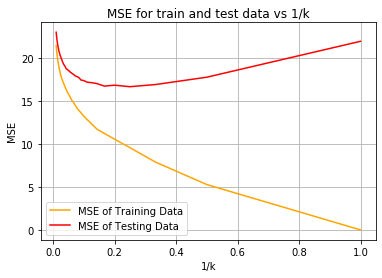

In [41]:
# k-nearest neighbor regression for this dataset using raw features
from sklearn.neighbors import KNeighborsRegressor

krange = np.arange(1,101)
testing_error = []
training_error = []

for k in krange:
    knnModel = KNeighborsRegressor(n_neighbors=k)
    knnModel.fit(traindata[['AT','V','AP','RH']],traindata['PE'])

    train_error = mean_squared_error(traindata['PE'], knnModel.predict(traindata[['AT','V','AP','RH']]))
    test_error = mean_squared_error(testdata['PE'], knnModel.predict(testdata[['AT','V','AP','RH']]))
    
    testing_error.append(test_error)
    training_error.append(train_error)
    
ind=training_error.index(min(training_error))
ind2=testing_error.index(min(testing_error))
K_inverse = [(1/k) for k in krange]
#print("The best K in this model is",krange[ind])
#print("The best 1/K in this model is",K_inverse[ind])
#print("The lowest train error is",(min(training_error)))
print("The best K in this model as per test error is", krange[ind2])
print("The best 1/K in this model is",K_inverse[ind2])
print("The lowest test error is",(min(testing_error)))
print("The train error at this 1/k value is ",training_error[ind2])


plt.title("MSE for train and test data vs 1/k")
plt.plot(K_inverse, training_error, color="orange",label = "MSE of Training Data")
plt.plot(K_inverse, testing_error, color="red",label = "MSE of Testing Data")
plt.xlabel("1/k")
plt.ylabel("MSE")
plt.legend()
plt.grid()
plt.show()

compare_errors.append(min(testing_error))

The best K in this model as per test error is 5
The best 1/K in this model is 0.2
The lowest test error is 14.36699251967955
The train error at this 1/k value is  9.512137801403616


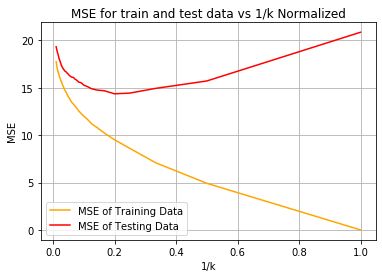

In [42]:
# k-nearest neighbor regression for this dataset using normalized features
#from sklearn.preprocessing import Normalizer
#from sklearn.preprocessing import normalize

xtrain=traindata[['AT','V','AP','RH']]
xtest=testdata[['AT','V','AP','RH']]

#xtrain=normalize(xtrain)
#xtest=normalize(xtest)

#xtrain= Normalizer().fit_transform(xtrain)
#xtest= Normalizer().fit_transform(xtest)



from sklearn.preprocessing import MinMaxScaler
min_max=MinMaxScaler()
# Scaling down both train and test data set
min_max.fit(xtrain)
xtrain = min_max.transform(xtrain)
xtest = min_max.transform(xtest)


#print(xtrain)
krange = np.arange(1,101)
testing_error = []
training_error = []



for k in krange:
    knnModel2 = KNeighborsRegressor(n_neighbors=k)
    knnModel2.fit(xtrain,traindata['PE'])

    train_error = mean_squared_error(traindata['PE'], knnModel2.predict(xtrain))
    test_error = mean_squared_error(testdata['PE'], knnModel2.predict(xtest))
    
    testing_error.append(test_error)
    training_error.append(train_error)

    
ind=training_error.index(min(training_error))
ind2=testing_error.index(min(testing_error))
K_inverse = [(1/k) for k in krange]
#print("The best K in this model is",krange[ind])
#print("The best 1/K in this model is",K_inverse[ind])
#print("The lowest train error is",(min(training_error)))
print("The best K in this model as per test error is", krange[ind2])
print("The best 1/K in this model is",K_inverse[ind2])
print("The lowest test error is",(min(testing_error)))
print("The train error at this 1/k value is ",training_error[ind2])

plt.title("MSE for train and test data vs 1/k Normalized")
plt.plot(K_inverse, training_error, color="orange",label = "MSE of Training Data")
plt.plot(K_inverse, testing_error, color="red",label = "MSE of Testing Data")
plt.xlabel("1/k")
plt.ylabel("MSE")
plt.legend()
plt.grid()
plt.show()


compare_errors.append(min(testing_error))

#### 1(j) Compare the results of KNN Regression with the linear regression model that has the smallest test error and provide your analysis.

In [43]:
print("The test MSE values for the respective models are-:")
results={"LR model with least error from part 1(h)":compare_errors[0],
         "KNN model with raw features":compare_errors[1],
         "KNN model with normalized features":compare_errors[2]
        }
pd.DataFrame.from_dict(results, orient='index',columns=['MSE for Test data'])

The test MSE values for the respective models are-:


,MSE for Test data
LR model with least error from part 1(h),18.917081
KNN model with raw features,16.656070
KNN model with normalized features,14.366993


#### Conclusion：
Analysing the results of the above mentioned models, we can directly find that KNN regression model is better than the best linear regression model. In linear models, after employing quadratic and interaction terms and removing non-statistically significant variables (with high p-values), the accuracy of the model improves.This is our best linear model. 
On the other hand, for the KNN regression model, normalizing features improves the model. Thus, as per the test MSE values, the KNN model with normalized features performs better than the best linear regression model.
The above analysis is based on my training data and testing data. On changing the training data and test data, the MSE of each model might change and the conclusion might also be differ. Therefore, this analysis is relevant solely for my training-testing data.

### 2. ISLR: 2.4.1
#### For each of parts (a) through (d), indicate whether we would generally expect the performance of a flexible statistical learning method to be better or worse than an inflexible method. Justify your answer.
#### (a) The sample size n is extremely large, and the number of predictors p is small.
##### Better
When the data size n is extremely large and the number of features p is small, we get a higher degree of freedom, which implies we should employ a highly flexible method. If we use an inflexible method, for instance, a linear model, there is a higher bias and the model fit for the training data isn't good. A flexible method would fit the data better.
#### (b) The number of predictors p is extremely large, and the number of observations n is small.
##### Worse
When the feature size p is extremely large and the number of observations n is small, a flexible method would overfit the small number of observations, leading to high variance. Thus, in such cases, inflexible methods are the better option. 
#### (c) The relationship between the predictors and response is highly non-linear.
##### Better 
As the relationship is non-linear, we need a model with high flexibility as it would provide a better fit. An inflexible method would very likely lead to underfitting and it is very difficult for inflexible models to describe non-linear relations.
#### (d) The variance of the error terms, i.e. σ2 = Var(ε), is extremely high.
##### Worse
A flexible model has a high degree of freedom and usually has a lower bias but higher variance. Since the Var(ε) is already is very high, we should opt for an inflexible model to balance and avoid overfitting. 

### 3. ISLR: 2.4.7
#### The table below provides a training data set containing six observa- tions, three predictors, and one qualitative response variable.
|Obs. |X1| X2 |X3| Y|
|---|---|---|---|---|
|1| 0|3|0|Red|
|2| 2|0|0|Red|
|3| 0|1|3|Red|
|4| 0|1|2|Green| 
|5| −1| 0| 1| Green|
|6| 1|1|1|Red|

Suppose we wish to use this data set to make a prediction for Y when X1 = X2 = X3 = 0 using K-nearest neighbors.
#### (a) Compute the Euclidean distance between each observation and the test point, X1 =X2 =X3 =0.
The Euclidean distance in 3 dimension is calculated as sqrt($(X1 - X2 )^{2}$ + $(Y1 - Y2)^{2}$ + $(Z1 - Z2)^{2}$)
Let the points be labelled as p1,p2,p3,p4,p5,p6 and p be the test point

$$distance_{p1,p} = {\sqrt{0 + 3^2 + 0}} = {\sqrt{9} =3} $$ 
$$distance_{p2,p} = {\sqrt{2^2 + 0 + 0}} = {\sqrt{4} = 2}$$ 
$$distance_{p3,p} = {\sqrt{0 + 1^2 + 3^2}} = {\sqrt{10} =3.1622776601683795}$$ 
$$distance_{p4,p} = {\sqrt{0 + 1^2 + 2^2}} = {\sqrt{5} = 2.23606797749979}$$ 
$$distance_{p5,p} = {\sqrt{(-1)^2 + 0 + 1^2}} = {\sqrt{2}=1.4142135623730951}$$ 
$$distance_{p6,p} = {\sqrt{1^2 + 1^2 + 1^2}} = {\sqrt{3}=1.7320508075688772}$$ 


#### (b) What is our prediction with K = 1? Why?
As we can see from the distances displayed above,the 5th point(-1,0,1) is the closest data point which is green. Thus, the test point(0,0,0) is green.
#### (c) What is our prediction with K = 3? Why?
As we can see from the distances displayed above, the three closest data points are 5th, 6th, and 2nd. Among these, two are red and one is green.Assuming uniform weighting of points, the test point is red.
#### (d) If the Bayes decision boundary in this problem is highly non- linear, then would we expect the best value for K to be large or small? Why?
##### Small
If the Bayes decision boundary is non-linear, it implies high model flexibility. Small k is more flexible and as k-value increases, the model's flexibility decreases ( i.e,bigger k-value fits a more smoother boundary as a result of taking more points into consideration).